In [1]:
import pandas as pd

df_all = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")
print(df_all)

         citing   cited  label  split  tfidf_similarity  specter_similarity  \
0         58335  113748      0  train          0.100756            0.922805   
1         18144   90516      0  train          0.005954            0.831618   
2         87793  130708      0  train          0.018084            0.876241   
3         33290   12998      1  train          0.018639            0.930751   
4         77459   19749      0  train          0.014315            0.807812   
...         ...     ...    ...    ...               ...                 ...   
2183905   12941   24268      1    val          0.081605            0.927775   
2183906   17782  125452      0    val          0.045687            0.807182   
2183907   81928   20361      1    val          0.000000            0.000000   
2183908  120936  117166      0    val          0.033080            0.844538   
2183909   23226   55321      0    val          0.037247            0.870335   

         citing_bertopic_dominant_topic  cited_bert

In [2]:
mask_train = df_all['split'] == 'train'
mask_val   = df_all['split'] == 'val'


train_data = df_all[mask_train]
val_data = df_all[mask_val]

print(train_data)
print(val_data)

         citing   cited  label  split  tfidf_similarity  specter_similarity  \
0         58335  113748      0  train          0.100756            0.922805   
1         18144   90516      0  train          0.005954            0.831618   
2         87793  130708      0  train          0.018084            0.876241   
3         33290   12998      1  train          0.018639            0.930751   
4         77459   19749      0  train          0.014315            0.807812   
...         ...     ...    ...    ...               ...                 ...   
1965514   47846  137916      0  train          0.000000            0.000000   
1965515   47780   68296      0  train          0.008918            0.879030   
1965516  133820  127109      0  train          0.001829            0.868974   
1965517  113101  119230      1  train          0.151788            0.916445   
1965518   91594  113515      0  train          0.053934            0.863798   

         citing_bertopic_dominant_topic  cited_bert

In [4]:
feats=[]
for col in train_data.columns:
    if col not in['citing', 'cited', 'label', 'split', 'split_koz', 'label_koz' ]:
        feats.append(col)

#print(feats)

In [6]:
import pandas as pd

# Φόρτωση train_data όπως πριν
df_all = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")
train_data = df_all[df_all['split'] == 'train']

# Ορισμός feats όπως πριν
meta_exclude = ['citing','cited','label','split','split_koz','label_koz', 'label_p1']
feats = [c for c in train_data.columns if c not in meta_exclude]

# Υπολόγισε το Pearson corr series
corr_series = train_data[feats + ['label']].corr(method='pearson')['label'].drop('label')

# 1) Δες ποια features έχουν NaN στη συσχέτιση
nan_feats = corr_series[corr_series.isna()]
print("Features with NaN Pearson correlation:\n", nan_feats.index.tolist(), "\n")

# 2) Έλεγξε αν οφείλεται σε missing values
missing_feats = [col for col in feats if train_data[col].isnull().any()]
print("Features containing NaNs in the data:\n", missing_feats, "\n")

# 3) Έλεγξε αν οφείλεται σε zero variance (σταθερή στήλη)
zero_var_feats = train_data[feats].nunique()[lambda x: x == 1].index.tolist()
print("Features with zero variance (constant values):\n", zero_var_feats)


Features with NaN Pearson correlation:
 ['author_G_walklets_cosine', 'author_G_walklets_dot', 'author_G_walklets_l2'] 

Features containing NaNs in the data:
 [] 

Features with zero variance (constant values):
 ['split_p1', 'author_G_walklets_cosine', 'author_G_walklets_dot', 'author_G_walklets_l2']


Zero-variance features (will drop): ['split_p1', 'author_G_walklets_cosine', 'author_G_walklets_dot', 'author_G_walklets_l2']
Using features: ['tfidf_similarity', 'specter_similarity', 'citing_bertopic_dominant_topic', 'cited_bertopic_dominant_topic', 'same_bertopic', 'citing_bertopic_topic_entropy', 'cited_bertopic_topic_entropy', 'bertopic_topic_cosine_similarity', 'author_overlap', 'jaccard_authors', 'citing_author_mean_pagerank', 'cited_author_mean_pagerank', 'citing_author_max_pagerank', 'cited_author_max_pagerank', 'citing_author_mean_degree', 'cited_author_mean_degree', 'citing_in_degree', 'citing_out_degree', 'cited_in_degree', 'cited_out_degree', 'citing_degree', 'cited_degree', 'citing_pagerank', 'cited_pagerank', 'common_neighbors', 'citing_triangles', 'cited_triangles', 'citing_clustering', 'cited_clustering', 'citing_core_number', 'cited_core_number', 'citing_onion_number', 'cited_onion_number', 'citing_eig_centrality', 'cited_eig_centrality', 'common_neighbors_p1', 'citat

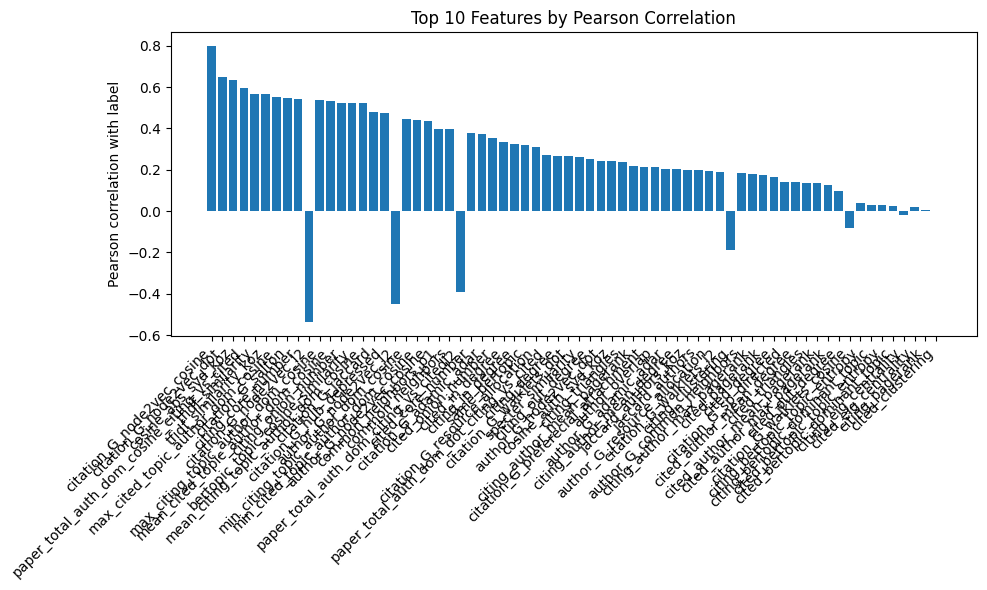

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Φόρτωση & split
df_all    = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")
train_data = df_all[df_all['split']=='train']

# 2) Αρχική λίστα feats
meta_exclude = ['citing','cited','label','split','split_koz','label_koz', 'label_p1']
feats_all    = [c for c in train_data.columns if c not in meta_exclude]

# 3) Εντοπισμός zero-variance features
zero_var = train_data[feats_all].nunique()
zero_var_feats = zero_var[zero_var == 1].index.tolist()
print("Zero-variance features (will drop):", zero_var_feats)

# 4) Καθαρισμός feats
feats = [c for c in feats_all if c not in zero_var_feats]
print("Using features:", feats, "\n")

# 5) Υπολογισμός Pearson correlations χωρίς τα zero-variance
corr = train_data[feats + ['label']].corr(method='pearson')['label'].drop('label')
corr_abs = corr.abs().sort_values(ascending=False)

# 6) Top 10 & εκτύπωση
top_n = 10
top_feats = corr_abs..index
print("Top 10 features by |Pearson correlation|:")
print(corr.loc[top_feats])

# 7) Visualization
top_corr = corr.loc[top_feats]
plt.figure(figsize=(10,6))
plt.bar(top_feats, top_corr.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Pearson correlation with label')
plt.title(f'Top {top_n} Features by Pearson Correlation')
plt.tight_layout()
plt.show()


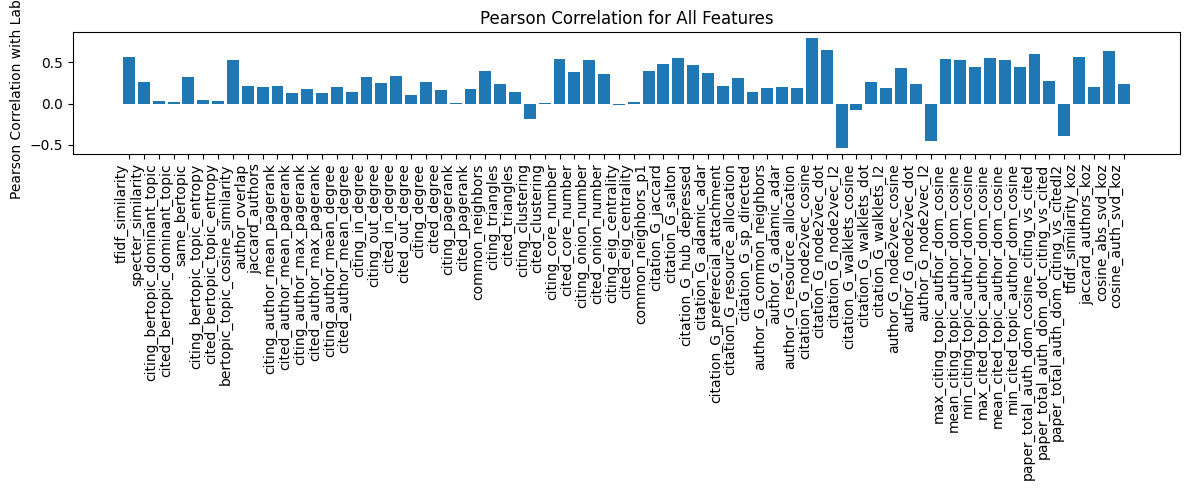

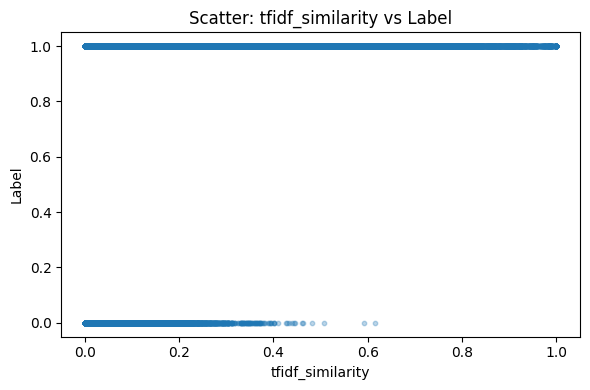

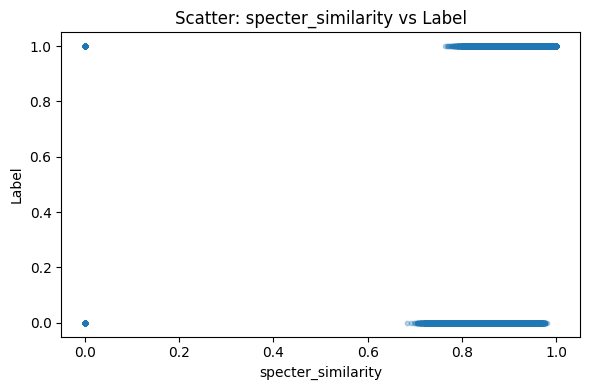

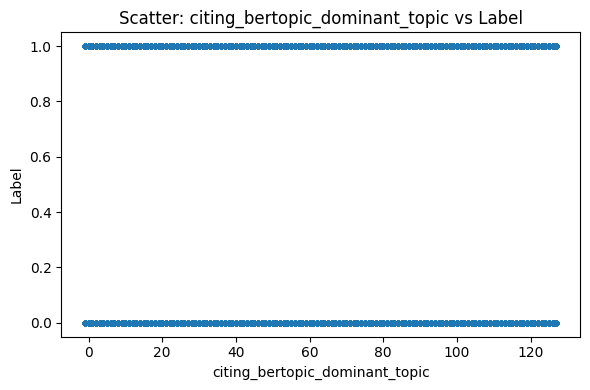

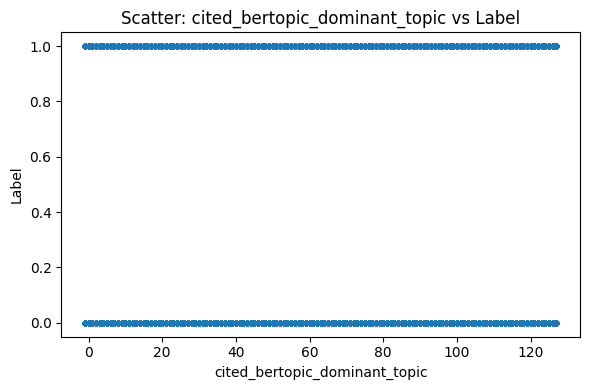

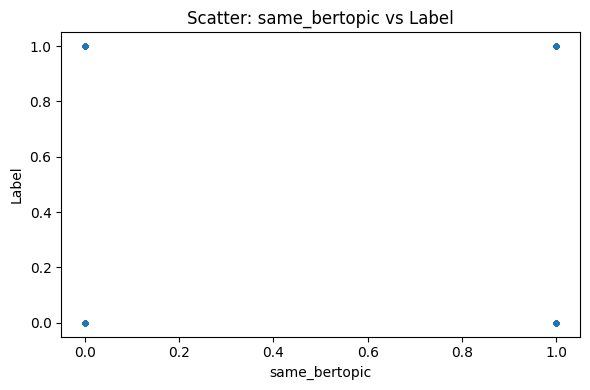

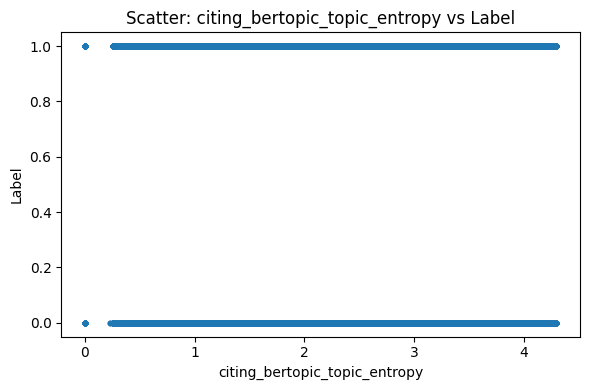

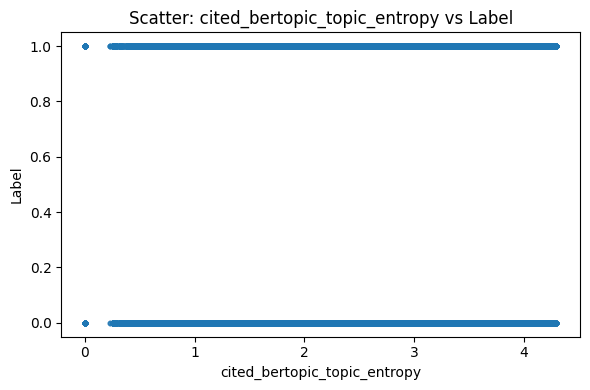

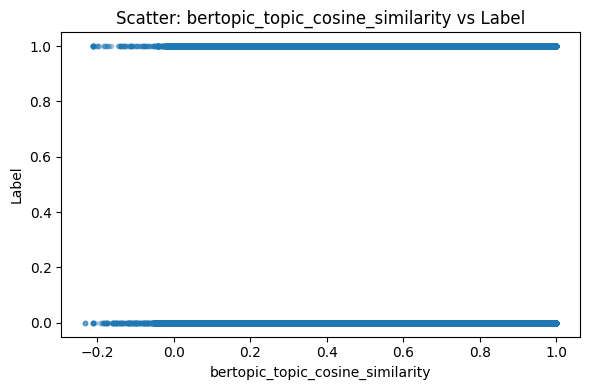

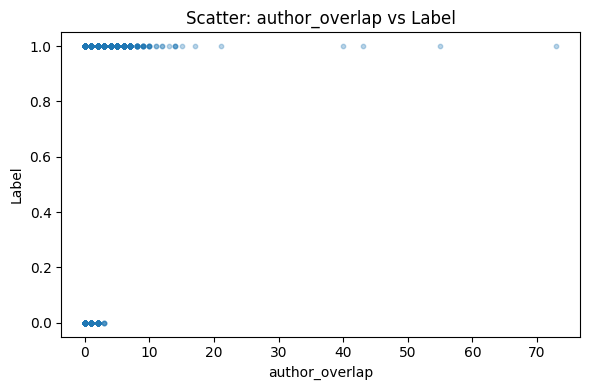

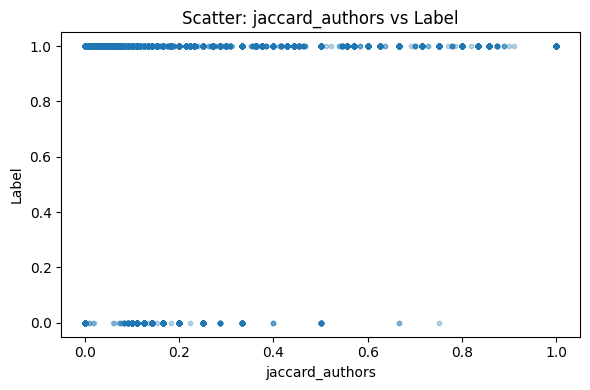

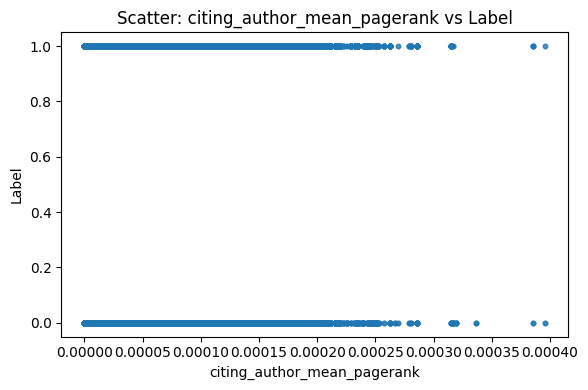

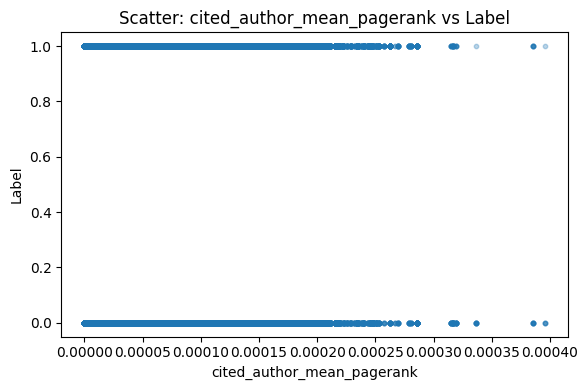

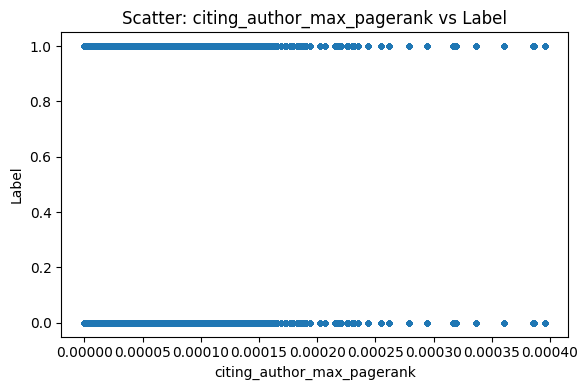

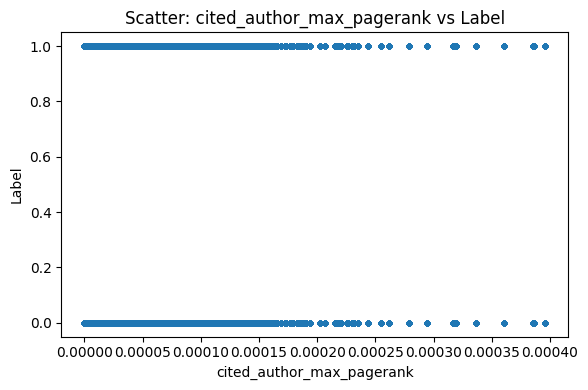

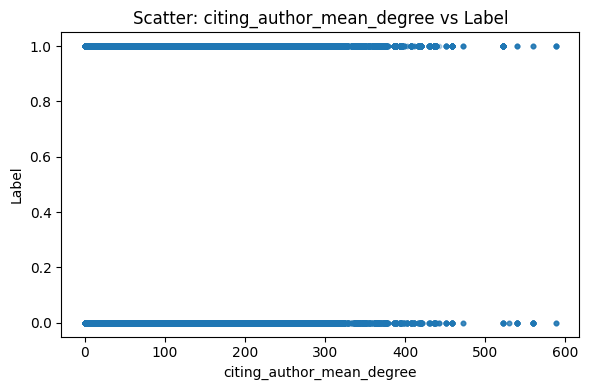

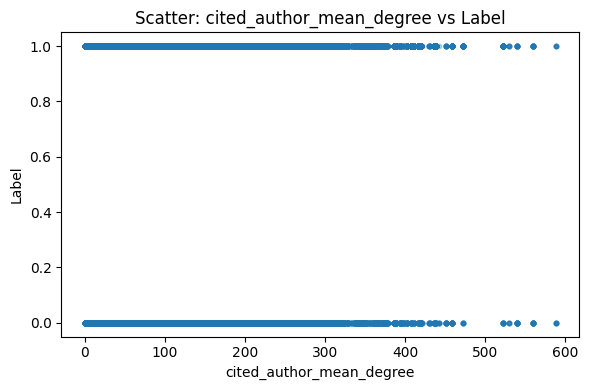

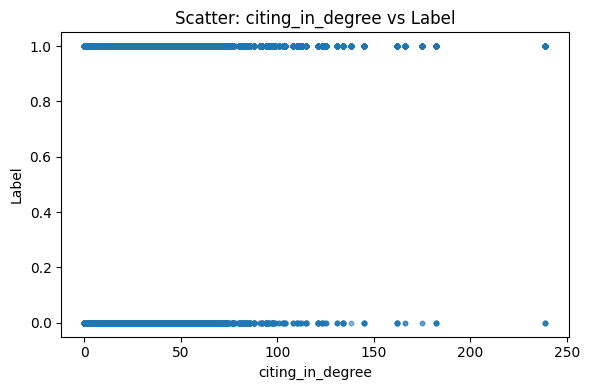

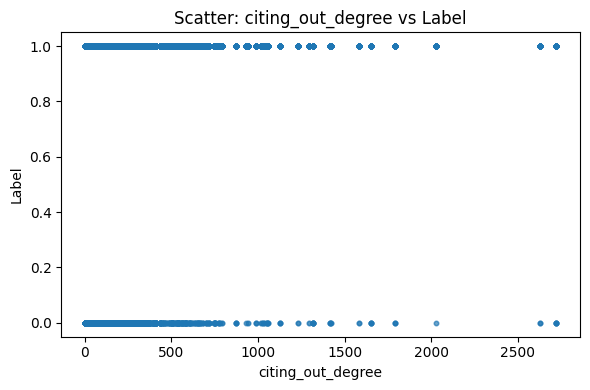

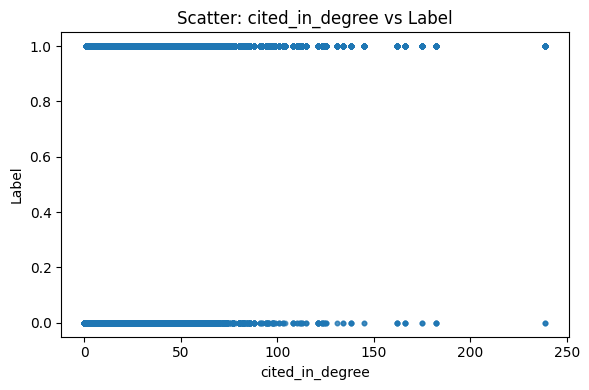

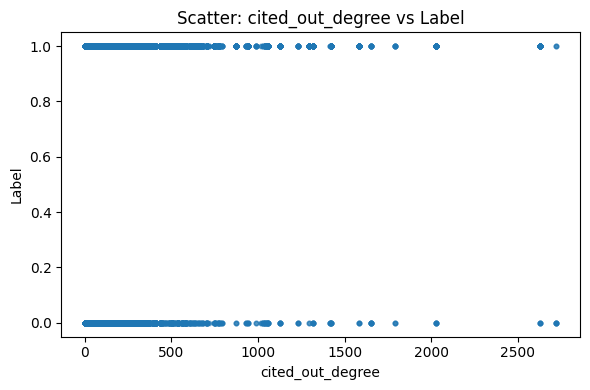

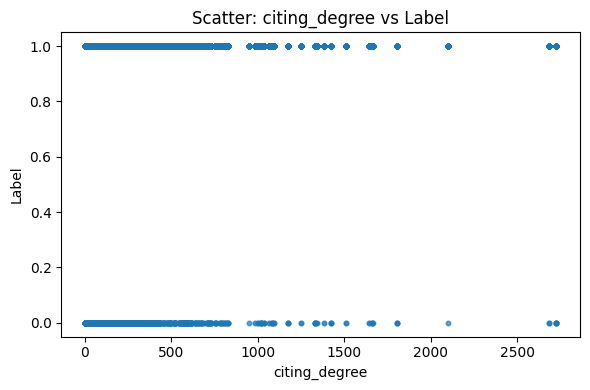

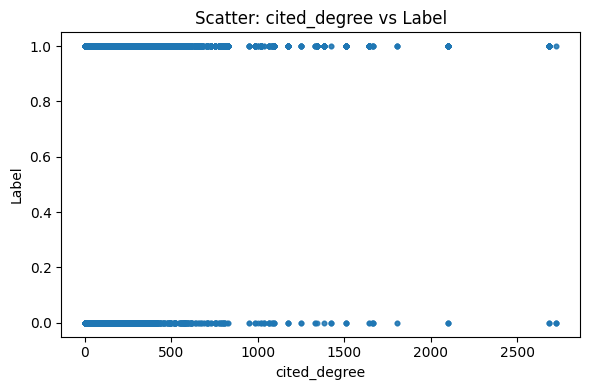

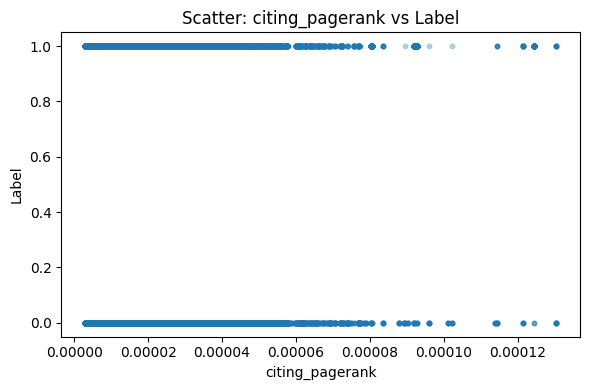

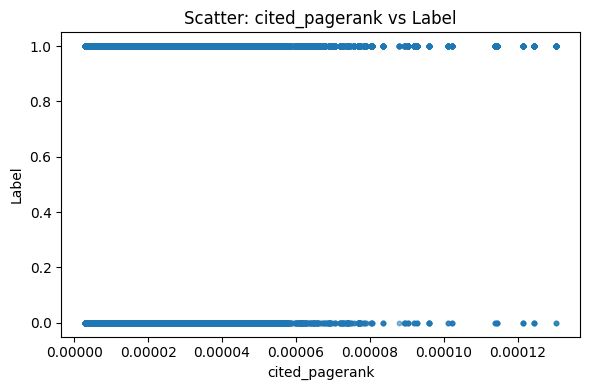

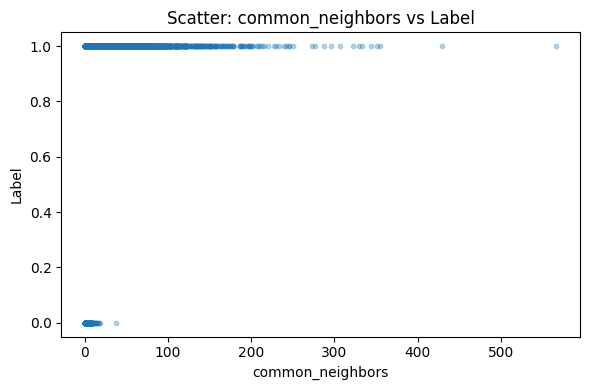

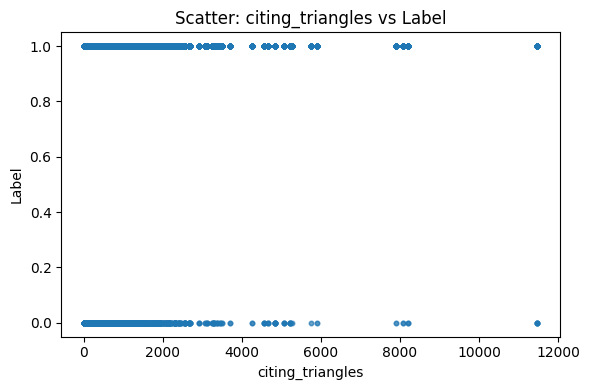

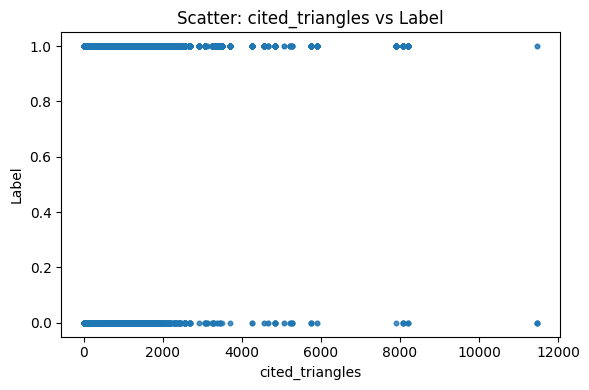

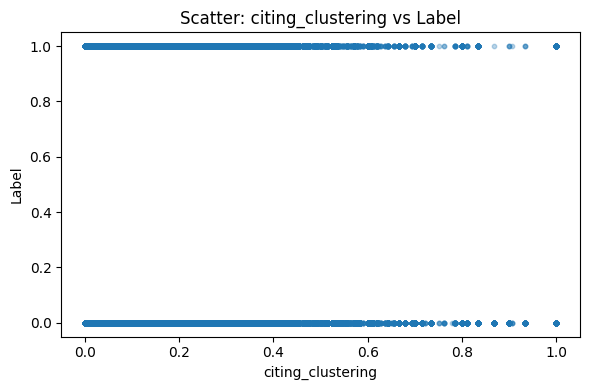

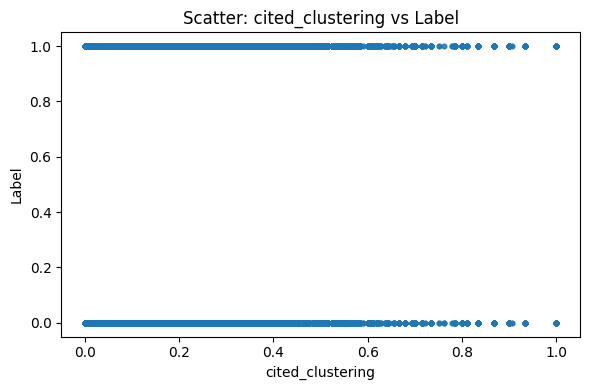

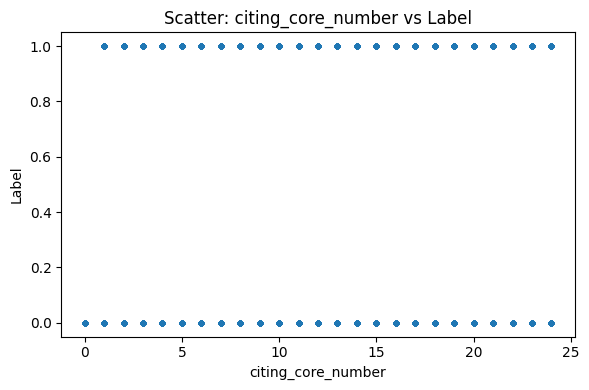

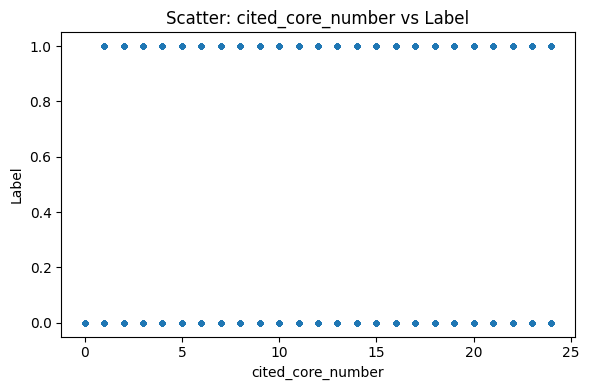

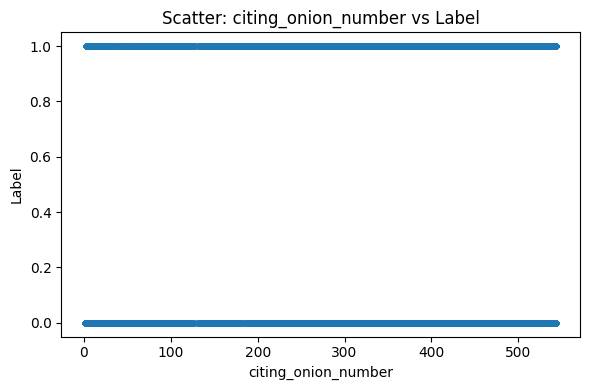

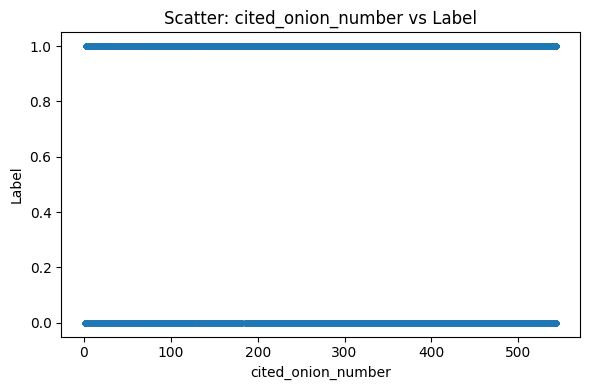

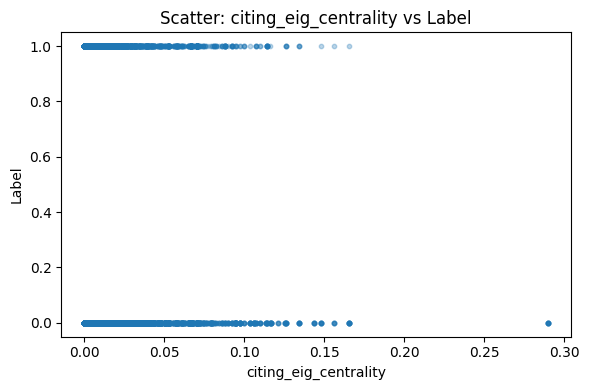

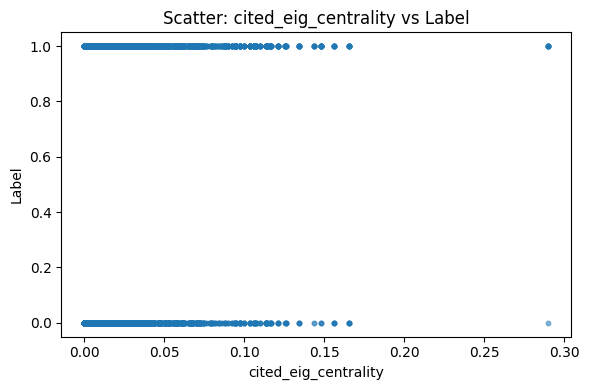

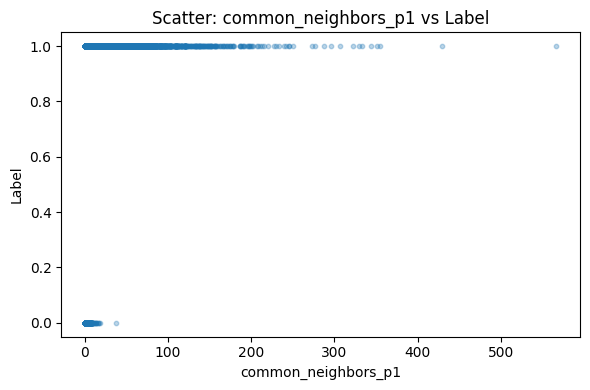

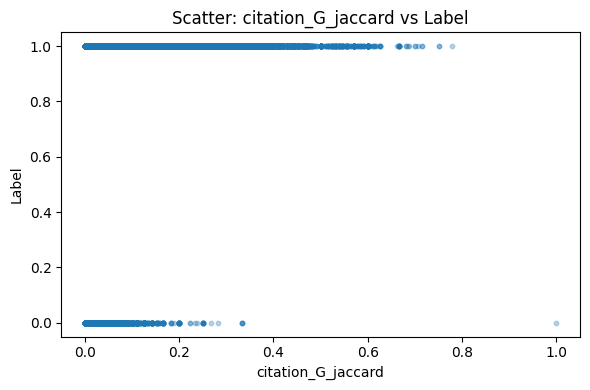

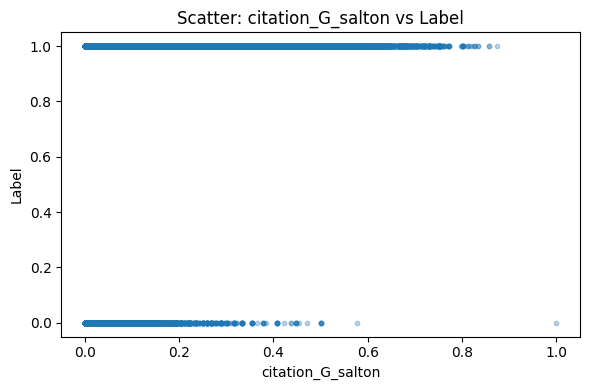

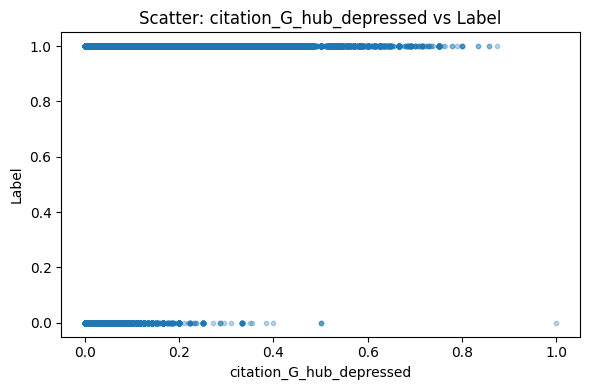

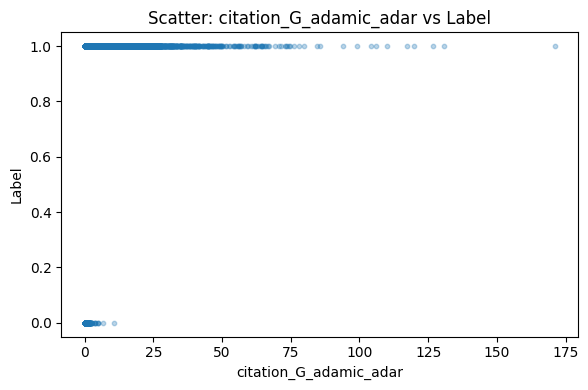

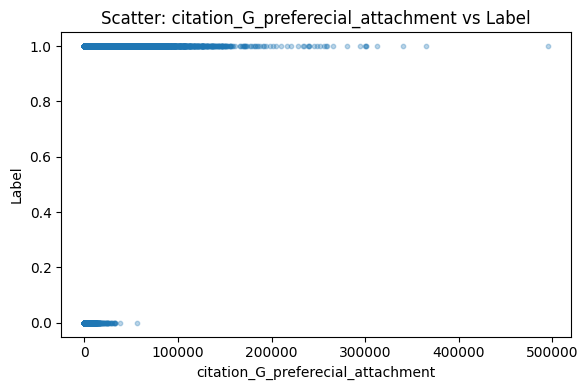

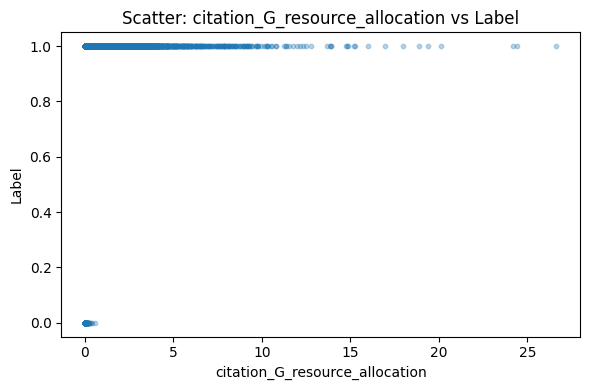

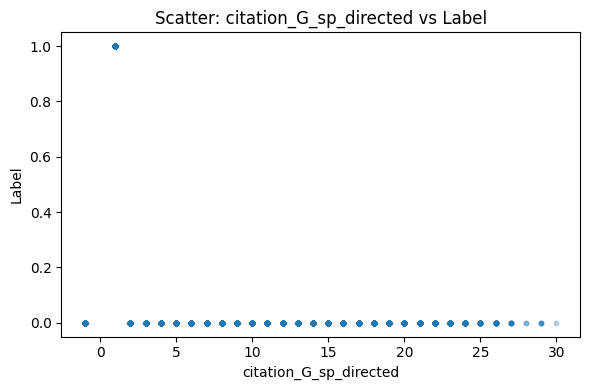

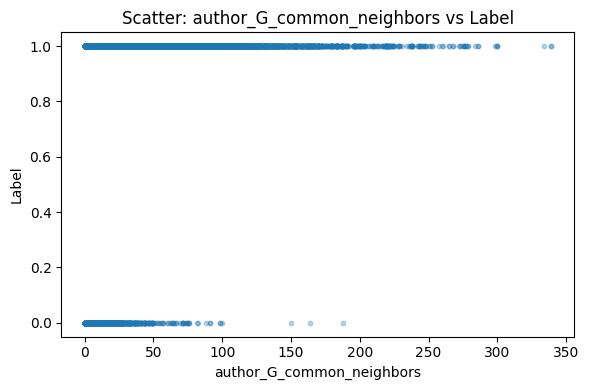

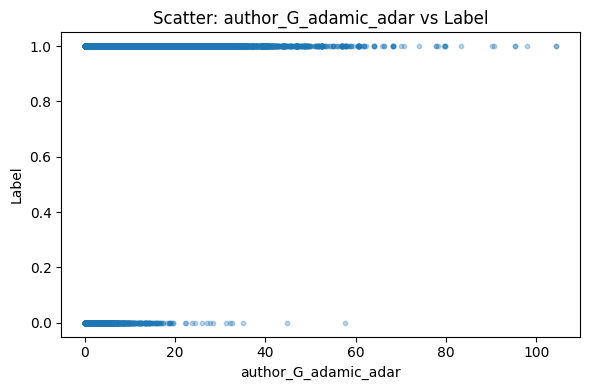

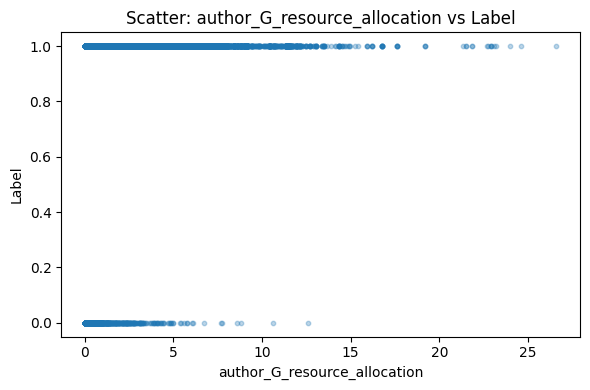

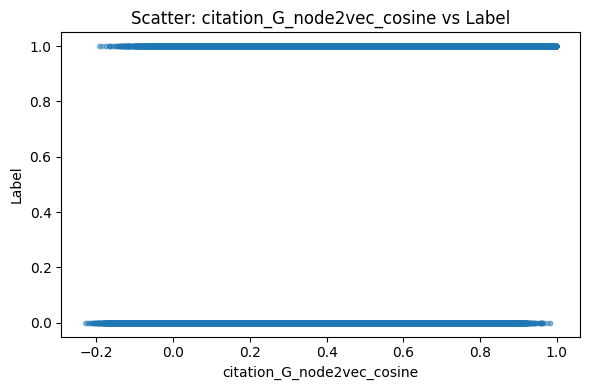

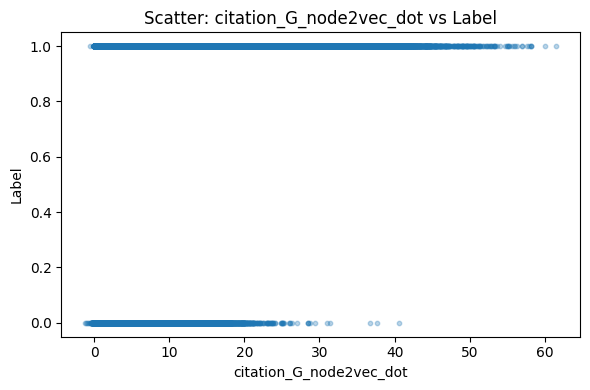

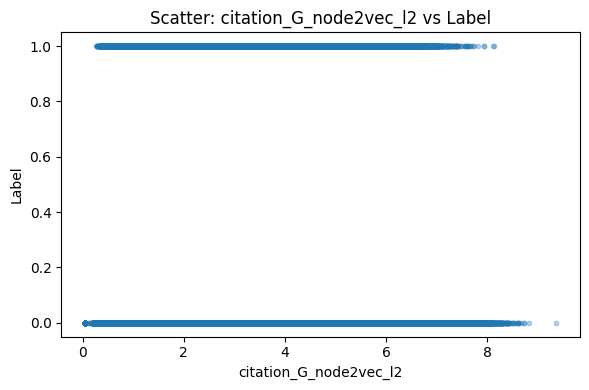

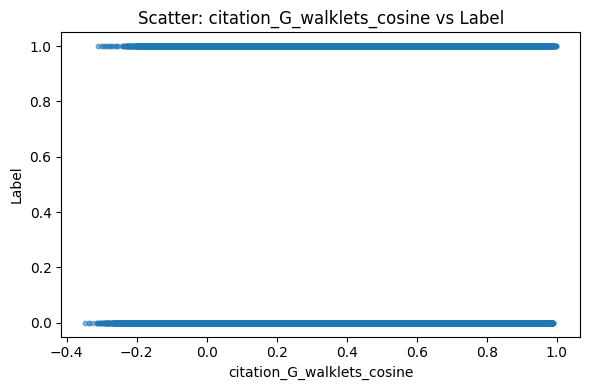

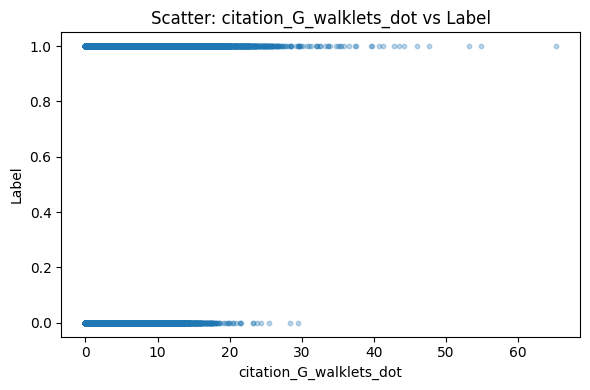

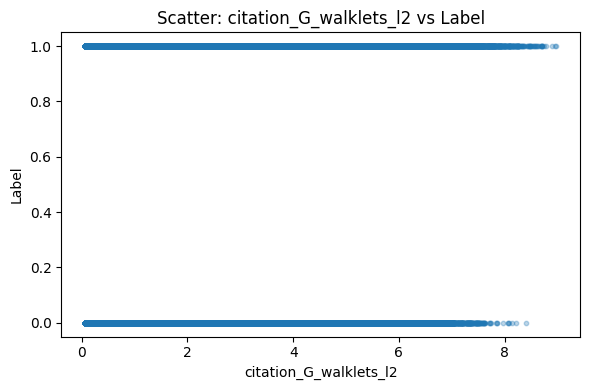

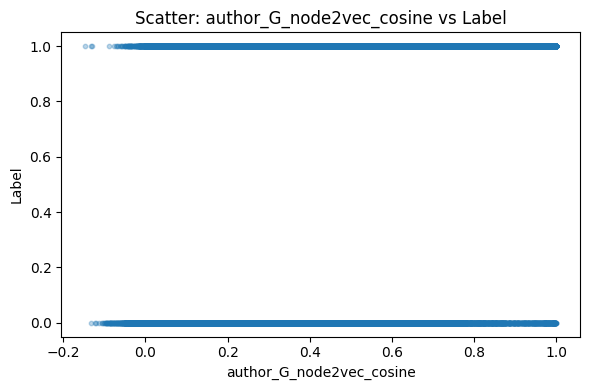

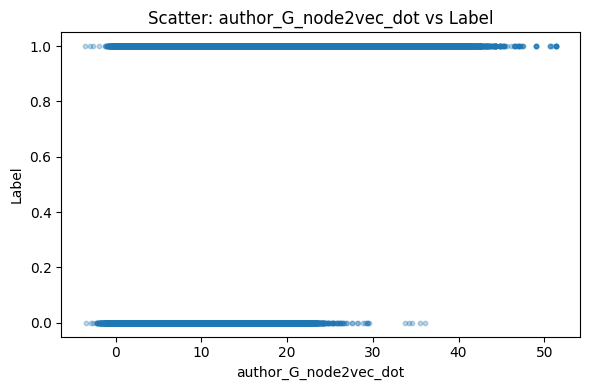

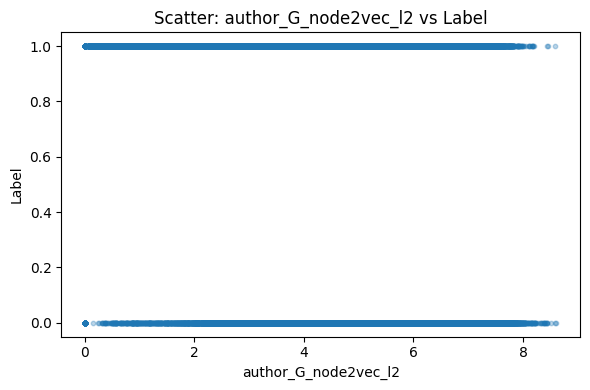

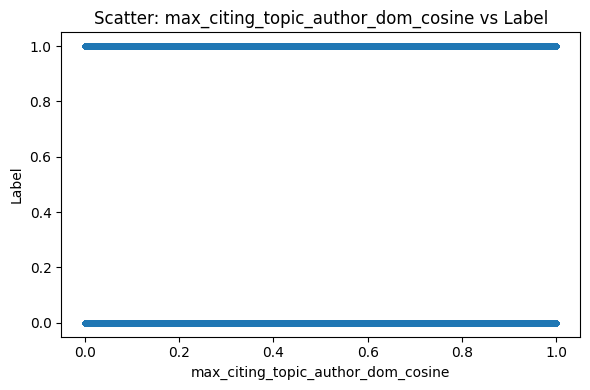

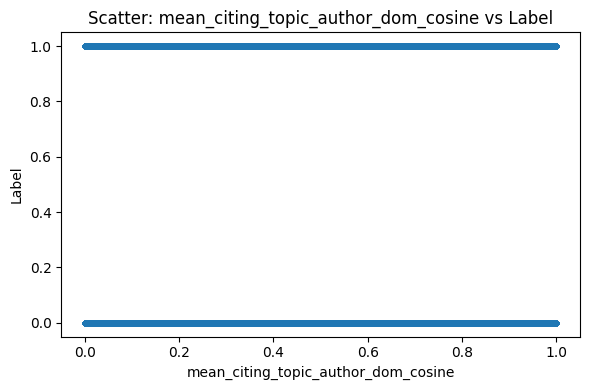

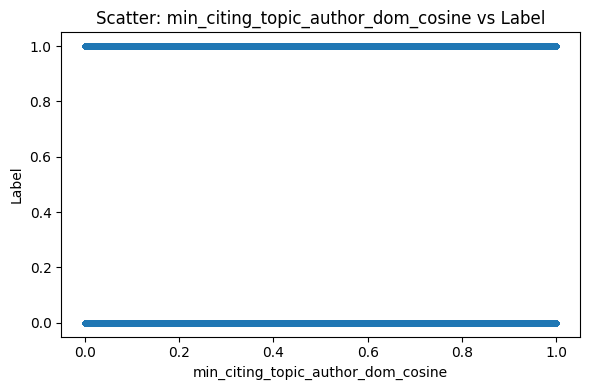

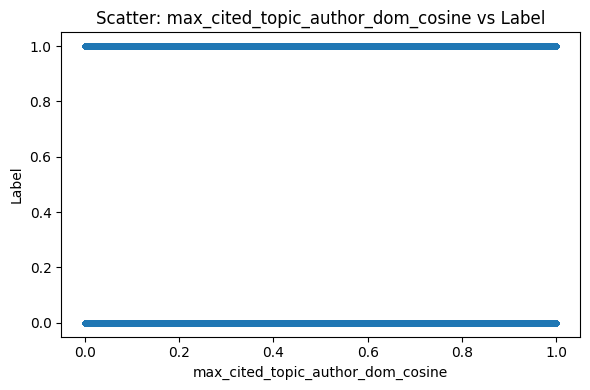

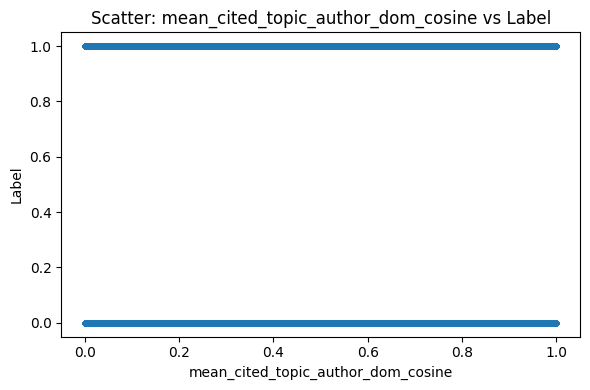

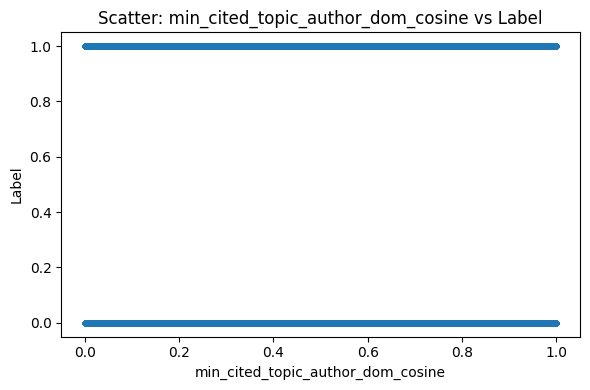

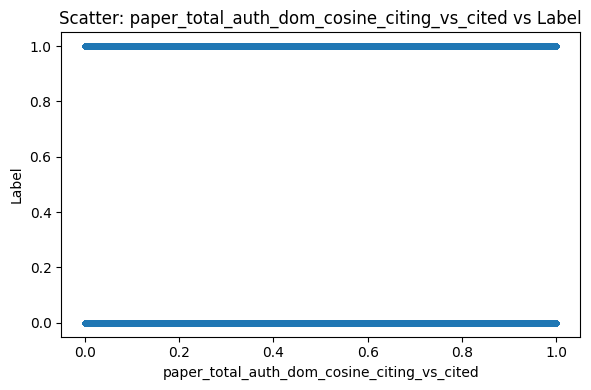

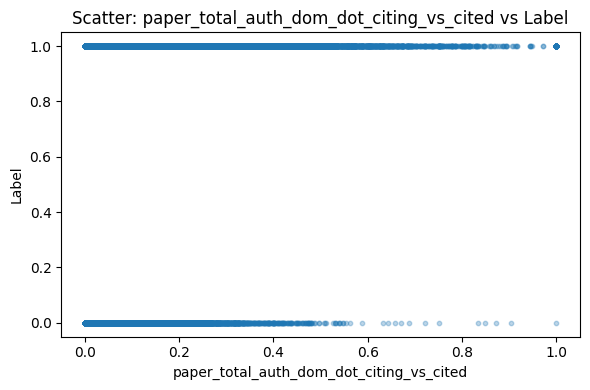

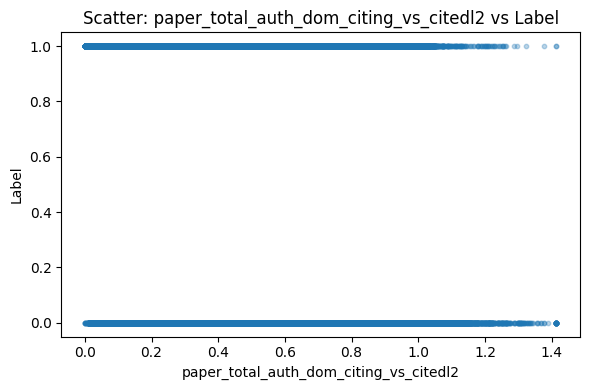

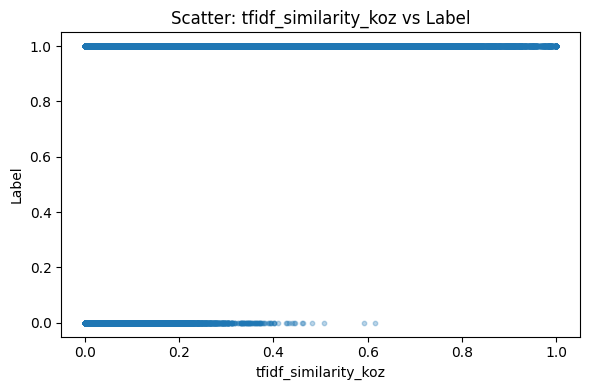

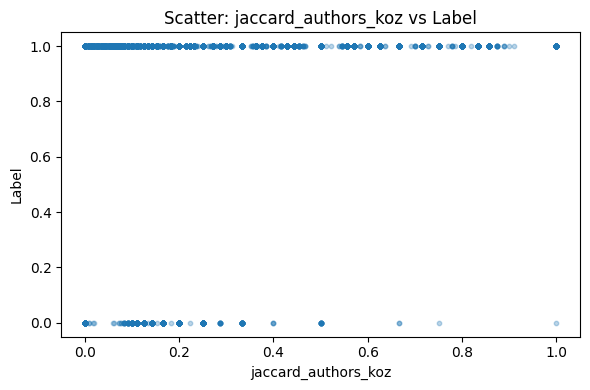

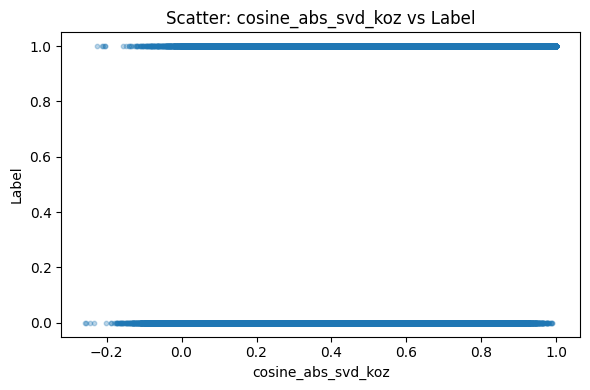

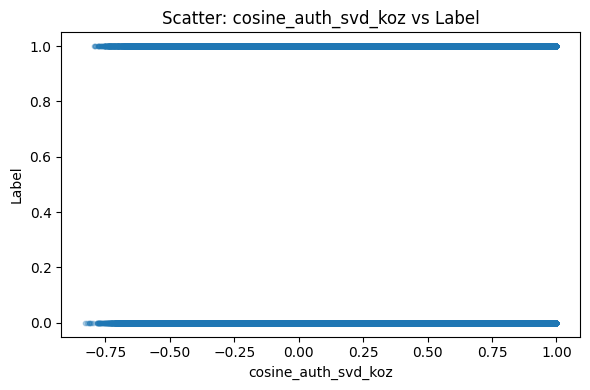

In [18]:
import matplotlib.pyplot as plt
import numpy as np
feats = [ 'tfidf_similarity_koz','common_neighbors', 'citing_degree','paper_total_auth_dom_cosine_citing_vs_cited', 'jaccard_authors',

          'citing_triangles', 

       # 'citation_G_node2vec_cosine', 'citation_G_node2vec_dot', 'citation_G_node2vec_l2',
       #    'citation_G_walklets_cosine', 'citation_G_walklets_dot', 'citation_G_walklets_l2',
          'author_G_node2vec_cosine', 'author_G_node2vec_dot', 'author_G_node2vec_l2', 
          # 'author_G_walklets_cosine', 'author_G_walklets_dot', 'author_G_walklets_l2'

          
     
    
        ]

feats= ['tfidf_similarity', 'specter_similarity', 'citing_bertopic_dominant_topic', 'cited_bertopic_dominant_topic',
        'same_bertopic', 'citing_bertopic_topic_entropy', 'cited_bertopic_topic_entropy', 'bertopic_topic_cosine_similarity', 
        'author_overlap', 'jaccard_authors', 'citing_author_mean_pagerank', 'cited_author_mean_pagerank', 'citing_author_max_pagerank',
        'cited_author_max_pagerank', 'citing_author_mean_degree', 'cited_author_mean_degree', 'citing_in_degree', 'citing_out_degree',
        'cited_in_degree', 'cited_out_degree', 'citing_degree', 'cited_degree', 'citing_pagerank', 'cited_pagerank', 'common_neighbors', 
        'citing_triangles', 'cited_triangles', 'citing_clustering', 'cited_clustering', 'citing_core_number', 'cited_core_number', 'citing_onion_number',
        'cited_onion_number', 'citing_eig_centrality', 'cited_eig_centrality', 'common_neighbors_p1', 'citation_G_jaccard', 'citation_G_salton', 
        'citation_G_hub_depressed', 'citation_G_adamic_adar', 'citation_G_preferecial_attachment', 'citation_G_resource_allocation', 'citation_G_sp_directed',
        'author_G_common_neighbors', 'author_G_adamic_adar', 'author_G_resource_allocation', 'citation_G_node2vec_cosine', 'citation_G_node2vec_dot', 
        'citation_G_node2vec_l2', 'citation_G_walklets_cosine', 'citation_G_walklets_dot', 'citation_G_walklets_l2', 'author_G_node2vec_cosine',
        'author_G_node2vec_dot', 'author_G_node2vec_l2', 'max_citing_topic_author_dom_cosine', 'mean_citing_topic_author_dom_cosine',
        'min_citing_topic_author_dom_cosine', 'max_cited_topic_author_dom_cosine', 'mean_cited_topic_author_dom_cosine', 
        'min_cited_topic_author_dom_cosine', 'paper_total_auth_dom_cosine_citing_vs_cited', 'paper_total_auth_dom_dot_citing_vs_cited',
        'paper_total_auth_dom_citing_vs_citedl2', 'tfidf_similarity_koz', 'jaccard_authors_koz', 'cosine_abs_svd_koz', 'cosine_auth_svd_koz']
# Υποθέτουμε ότι 'train_data' και 'feats' είναι ήδη διαθέσιμα στο περιβάλλον εργασίας
# και ότι 'train_data' περιέχει τη στήλη 'label'.

# 1) Υπολόγισε Pearson correlation για όλα τα feats
corr_series = train_data[feats + ['label']].corr(method='pearson')['label'].drop('label')

# 2) Bar chart για όλες τις συσχετίσεις
plt.figure(figsize=(12, 5))
plt.bar(feats, corr_series.values)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Pearson Correlation with Label')
plt.title('Pearson Correlation for All Features')
plt.tight_layout()
plt.show()

# 3) Scatter plots: κάθε feature vs το label
for feat in feats:
    plt.figure(figsize=(6, 4))
    plt.scatter(train_data[feat], train_data['label'], alpha=0.3, s=10)
    plt.xlabel(feat)
    plt.ylabel('Label')
    plt.title(f'Scatter: {feat} vs Label')
    plt.tight_layout()
    plt.show()


In [42]:
# 1) Ορισμός feats στα Top‐4
feats = [
            'common_neighbors',
         
         'citation_G_jaccard', 'citation_G_salton', 
        'citation_G_hub_depressed', 'citation_G_adamic_adar', 
        'tfidf_similarity','citing_degree',



     'author_G_node2vec_cosine',
        'author_G_node2vec_dot', 'author_G_node2vec_l2', 'max_citing_topic_author_dom_cosine', 'mean_citing_topic_author_dom_cosine',
        'min_citing_topic_author_dom_cosine', 'max_cited_topic_author_dom_cosine', 'mean_cited_topic_author_dom_cosine', 
        'min_cited_topic_author_dom_cosine', 'paper_total_auth_dom_cosine_citing_vs_cited', 'paper_total_auth_dom_dot_citing_vs_cited',
        'paper_total_auth_dom_citing_vs_citedl2',  'jaccard_authors_koz', 'cosine_abs_svd_koz', 'cosine_auth_svd_koz',
    
        'specter_similarity', 'citing_bertopic_dominant_topic', 'cited_bertopic_dominant_topic',
        'same_bertopic', 'citing_bertopic_topic_entropy', 'cited_bertopic_topic_entropy', 'bertopic_topic_cosine_similarity', 
        'author_overlap', 'citing_author_mean_pagerank', 'cited_author_mean_pagerank', 'citing_author_max_pagerank',
        'cited_author_max_pagerank', 'citing_author_mean_degree', 'cited_author_mean_degree', 'citing_in_degree', 'citing_out_degree',
        'cited_in_degree', 'cited_out_degree',  'cited_degree', 'citing_pagerank', 'cited_pagerank',
   
        ]

# 2) Φόρτωση & split
import pandas as pd
df_all    = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")
train_data = df_all[df_all['split']=='train']
val_data   = df_all[df_all['split']=='val']

X_train, y_train = train_data[feats], train_data['label']
X_val,   y_val   = val_data[feats],   val_data['label']

# 3) Pipeline με scaling + LR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), feats)
], remainder="drop")

pipeline = Pipeline([
    ("scaler", preprocessor),
    ("clf",   LogisticRegression(C=1.0, max_iter=1000, solver='lbfgs', n_jobs=-1))
])

# 4) Εκπαίδευση + Αξιολόγηση
pipeline.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score, log_loss

probs = pipeline.predict_proba(X_val)[:,1]
preds = (probs >= 0.5).astype(int)

print("Log Loss:", log_loss(y_val, probs))
print("ROC AUC :", roc_auc_score(y_val, probs))
print("\nClassification Report:\n", classification_report(y_val, preds))


Log Loss: 0.14305331625898704
ROC AUC : 0.9871208108245164

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    109196
           1       0.97      0.93      0.95    109195

    accuracy                           0.95    218391
   macro avg       0.95      0.95      0.95    218391
weighted avg       0.95      0.95      0.95    218391



In [2]:
# 1) Ορισμός feats στα Top‐4
feats = [
            'common_neighbors',
         
         'citation_G_jaccard', 'citation_G_salton', 
        'citation_G_hub_depressed', 'citation_G_adamic_adar', 
        'tfidf_similarity','citing_degree',



         'author_G_node2vec_cosine',
    
        'author_G_node2vec_dot', 'author_G_node2vec_l2',
    
    'max_citing_topic_author_dom_cosine', 'mean_citing_topic_author_dom_cosine',
        'min_citing_topic_author_dom_cosine', 'max_cited_topic_author_dom_cosine', 'mean_cited_topic_author_dom_cosine', 
        'min_cited_topic_author_dom_cosine', 'paper_total_auth_dom_cosine_citing_vs_cited', 'paper_total_auth_dom_dot_citing_vs_cited',
        'paper_total_auth_dom_citing_vs_citedl2',  'jaccard_authors_koz', 
        'cosine_abs_svd_koz', 'cosine_auth_svd_koz',
    
        'specter_similarity', 
        'citing_bertopic_dominant_topic', 'cited_bertopic_dominant_topic',
        'same_bertopic', 'citing_bertopic_topic_entropy', 'cited_bertopic_topic_entropy', 'bertopic_topic_cosine_similarity', 
        'author_overlap', 'citing_author_mean_pagerank', 'cited_author_mean_pagerank', 'citing_author_max_pagerank',
        'cited_author_max_pagerank', 'citing_author_mean_degree', 'cited_author_mean_degree', 'citing_in_degree', 'citing_out_degree',
        'cited_in_degree', 'cited_out_degree',  'cited_degree', 'citing_pagerank', 'cited_pagerank',

        'citing_triangles', 'cited_triangles', 'citing_clustering', 'cited_clustering', 'citing_core_number',
        'cited_core_number', 'citing_onion_number',
   
        ]

# 2) Φόρτωση & split
import pandas as pd
df_all    = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")
train_data = df_all[df_all['split']=='train']
val_data   = df_all[df_all['split']=='val']

X_train, y_train = train_data[feats], train_data['label']
X_val,   y_val   = val_data[feats],   val_data['label']

# 3) Pipeline με scaling + LR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), feats)
], remainder="drop")

pipeline = Pipeline([
    ("scaler", preprocessor),
    ("clf",   LogisticRegression(C=1.0, max_iter=1000, solver='lbfgs', n_jobs=-1))
])

# 4) Εκπαίδευση + Αξιολόγηση
pipeline.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score, log_loss

probs = pipeline.predict_proba(X_val)[:,1]
preds = (probs >= 0.5).astype(int)

print("Log Loss:", log_loss(y_val, probs))
print("ROC AUC :", roc_auc_score(y_val, probs))
print("\nClassification Report:\n", classification_report(y_val, preds))


Log Loss: 0.13770829134922116
ROC AUC : 0.987565123664298

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    109196
           1       0.97      0.93      0.95    109195

    accuracy                           0.95    218391
   macro avg       0.95      0.95      0.95    218391
weighted avg       0.95      0.95      0.95    218391



In [47]:
import pandas as pd

# --- 1) Φόρτωση του test set ---
test_path = "D:/NLP/data/test_features.parquet"
df_test = pd.read_parquet(test_path)

# --- 2) Ορισμός των feature columns (όπω
print(df_test.columns)

Index(['tfidf_similarity', 'specter_similarity', 'same_bertopic',
       'sum_bertopic_entropy', 'bertopic_topic_cosine', 'author_overlap',
       'jaccard_authors', 'author_mean_pagerank_citing',
       'author_mean_pagerank_cited', 'author_max_pagerank_citing',
       'author_max_pagerank_cited', 'author_mean_degree_citing',
       'author_mean_degree_cited', '(S) Degree', '(D) Degree',
       '(S) Avg neigh deg', '(D) Avg neigh deg', '(S) Triangles',
       '(D) Triangles', '(S) Core number', '(D) Core number',
       '(S) Eig centrality', '(D) Eig centrality', '(S) Clustering',
       '(D) Clustering', '(S) Greedy color', '(D) Greedy color',
       '(S) Onion number', '(D) Onion number', 'Jaccard Coefficient',
       'Salton index', 'Hub Depressed Index', 'Academic Adar Index',
       'Pref Attachment', 'Ressource Allocation Index', 'Shortest Path',
       'author_common_neighbors', 'author_adamic_adar',
       'author_resource_allocation', 'citation_node2vec_cosine',
       'citat

In [44]:
ς και πριν) ---
# meta_cols = ["citing", "cited", "label", "split",
#              #"Shortest Path"
#             ]
# feats = [c for c in df_test.columns if c not in meta_cols]

# 1) Ορισμός feats στα Top‐4
feats = [
            'common_neighbors',
         
         'citation_G_jaccard', 'citation_G_salton', 
        'citation_G_hub_depressed', 'citation_G_adamic_adar', 
        'tfidf_similarity','citing_degree',



         'author_G_node2vec_cosine',
    
        'author_G_node2vec_dot', 'author_G_node2vec_l2', 'max_citing_topic_author_dom_cosine', 'mean_citing_topic_author_dom_cosine',
        'min_citing_topic_author_dom_cosine', 'max_cited_topic_author_dom_cosine', 'mean_cited_topic_author_dom_cosine', 
        'min_cited_topic_author_dom_cosine', 'paper_total_auth_dom_cosine_citing_vs_cited', 'paper_total_auth_dom_dot_citing_vs_cited',
        'paper_total_auth_dom_citing_vs_citedl2',  'jaccard_authors_koz', 'cosine_abs_svd_koz', 'cosine_auth_svd_koz',
    
        'specter_similarity', 'citing_bertopic_dominant_topic', 'cited_bertopic_dominant_topic',
        'same_bertopic', 'citing_bertopic_topic_entropy', 'cited_bertopic_topic_entropy', 'bertopic_topic_cosine_similarity', 
        'author_overlap', 'citing_author_mean_pagerank', 'cited_author_mean_pagerank', 'citing_author_max_pagerank',
        'cited_author_max_pagerank', 'citing_author_mean_degree', 'cited_author_mean_degree', 'citing_in_degree', 'citing_out_degree',
        'cited_in_degree', 'cited_out_degree',  'cited_degree', 'citing_pagerank', 'cited_pagerank',

        'citing_triangles', 'cited_triangles', 'citing_clustering', 'cited_clustering', 'citing_core_number',
        'cited_core_number', 'citing_onion_number',
   
        ]

X_test_new = df_test[feats]

# --- 3) Προβλέψεις πιθανότητας με το calibrated μοντέλο ---
#    (αν θες μη-καλιμπραρισμένες, αντικατέστησε calibrator με pipeline)
probs_test = pipeline.predict_proba(X_test_new)[:, 1]

# --- 4) Δημιουργία του DataFrame για το submission ---
submission = pd.DataFrame({
    "ID": df_test.index,    # ή range(len(probs_test))
    "Label": probs_test
})

# --- 5) Αποθήκευση σε CSV ---
output_path = "D:/NLP/data/test_predictions_many.csv"
submission.to_csv(output_path, index=False)

print(f"Saved test predictions to {output_path}")


KeyError: "['common_neighbors', 'citation_G_jaccard', 'citation_G_salton', 'citation_G_hub_depressed', 'citation_G_adamic_adar', 'citing_degree', 'author_G_node2vec_cosine', 'author_G_node2vec_dot', 'author_G_node2vec_l2', 'jaccard_authors_koz', 'cosine_abs_svd_koz', 'cosine_auth_svd_koz', 'citing_bertopic_dominant_topic', 'cited_bertopic_dominant_topic', 'citing_bertopic_topic_entropy', 'cited_bertopic_topic_entropy', 'bertopic_topic_cosine_similarity', 'citing_author_mean_pagerank', 'cited_author_mean_pagerank', 'citing_author_max_pagerank', 'cited_author_max_pagerank', 'citing_author_mean_degree', 'cited_author_mean_degree', 'citing_in_degree', 'citing_out_degree', 'cited_in_degree', 'cited_out_degree', 'cited_degree', 'citing_pagerank', 'cited_pagerank', 'citing_triangles', 'cited_triangles', 'citing_clustering', 'cited_clustering', 'citing_core_number', 'cited_core_number', 'citing_onion_number'] not in index"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume train_data and feats are already defined in this context.
# For demonstration, let's simulate train_data:
# train_data = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")[lambda df: df['split']=='train']
# feats = [col for col in train_data.columns if col not in ['citing', 'cited', 'label', 'split', 'split_koz', 'label_koz']]

# Compute Pearson correlations
corr_matrix = train_data[feats + ['label']].corr(method='pearson')
pearson_with_label = corr_matrix['label'].drop('label')
pearson_abs = pearson_with_label.abs().sort_values(ascending=False)

# Plot bar chart of top 10 features by absolute correlation
top_n = 10
top_abs = pearson_abs.head(top_n)
top_direct = pearson_with_label.loc[top_abs.index]

plt.figure(figsize=(10, 6))
plt.bar(top_abs.index, top_direct)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Pearson Correlation with Label')
plt.title('Top 10 Features by Pearson Correlation')
plt.tight_layout()
plt.show()


In [433]:
# feats = ['cosine_auth_svd_koz', 'tfidf_similarity_koz', 'jaccard_authors_koz', 'cosine_abs_svd_koz', 'common_neighbors',
#          'specter_similarity', 'citation_G_sp_directed', 'citing_onion_number', 
#          #'citing_core_number'
        
#         ]

# feats = ['citing_in_degree','citing_out_degree','cited_in_degree','cited_out_degree',
#          'citing_degree','cited_degree',  'citing_triangles', 'cited_triangles',
#          'citing_clustering', 'cited_clustering', 'citing_core_number', 'cited_core_number', 
#          'citing_onion_number', 'cited_onion_number', 'citing_eig_centrality', 'cited_eig_centrality',
#          'citing_pagerank', 'cited_pagerank',
#          'common_neighbors'
# ]

feats = [ 'tfidf_similarity_koz','common_neighbors', 'citing_degree','paper_total_auth_dom_cosine_citing_vs_cited', 'jaccard_authors',

          'citing_triangles', 

       # 'citation_G_node2vec_cosine', 'citation_G_node2vec_dot', 'citation_G_node2vec_l2',
       #    'citation_G_walklets_cosine', 'citation_G_walklets_dot', 'citation_G_walklets_l2',
          'author_G_node2vec_cosine', 'author_G_node2vec_dot', 'author_G_node2vec_l2', 
          # 'author_G_walklets_cosine', 'author_G_walklets_dot', 'author_G_walklets_l2'

          
     
    
        ]

In [434]:
X_train = train_data[feats]
y_train = train_data['label']
print("\nX_train:\n",X_train.head())
print("\ny_train:\n",y_train.head())


X_train:
    tfidf_similarity_koz  common_neighbors  citing_degree  \
0              0.100756                 0              3   
1              0.005954                 0             23   
2              0.018084                 0             11   
3              0.018639                 6            172   
4              0.014315                 0              9   

   paper_total_auth_dom_cosine_citing_vs_cited  jaccard_authors  \
0                                     0.997663              0.0   
1                                     0.111313              0.0   
2                                     0.035277              0.0   
3                                     0.879949              0.0   
4                                     0.418588              0.0   

   citing_triangles  author_G_node2vec_cosine  author_G_node2vec_dot  \
0                 1                  0.439839               6.917051   
1                30                  0.259745               3.950779   
2        

In [435]:
X_val = val_data[feats]
y_val = val_data['label']
print("\nX_val:\n",X_val.head())
print("\ny_val:\n",y_val.head())


X_val:
          tfidf_similarity_koz  common_neighbors  citing_degree  \
1965519              0.008067                 0              1   
1965520              0.008143                 0              4   
1965521              0.008311                 0             75   
1965522              0.000000                 5             95   
1965523              0.016277                 0             20   

         paper_total_auth_dom_cosine_citing_vs_cited  jaccard_authors  \
1965519                                     0.235327              0.0   
1965520                                     0.340141              0.0   
1965521                                     0.792614              0.0   
1965522                                     0.837654              0.0   
1965523                                     0.147432              0.0   

         citing_triangles  author_G_node2vec_cosine  author_G_node2vec_dot  \
1965519                 0                  0.445650               9.794376   

In [436]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# Έστω ότι έχετε ήδη X_train, y_train, X_val, y_val
# X_train, X_val: DataFrame με χαρακτηριστικά
# y_train, y_val: Series με ετικέτες

# 1. Ορισμός pipeline με scaling και logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

# 2. Εκπαίδευση μοντέλου
pipeline.fit(X_train, y_train)

# 3. Προβλέψεις στο validation set

y_pred = pipeline.predict(X_val)
# 3b. Προβλέψεις πιθανοτήτων για log loss

y_proba = pipeline.predict_proba(X_val)

# 4. Αξιολόγηση
acc = accuracy_score(y_val, y_pred)
ll  = log_loss(y_val, y_proba)
report = classification_report(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

print(f"Validation Accuracy: {acc:.4f}")
print(f"Validation Log Loss: {ll:.4f}\n")
print("Classification Report:")
print(report)
print("\nConfusion Matrix:")
print(cm)

Validation Accuracy: 0.9455
Validation Log Loss: 0.1557

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    109196
           1       0.97      0.92      0.94    109195

    accuracy                           0.95    218391
   macro avg       0.95      0.95      0.95    218391
weighted avg       0.95      0.95      0.95    218391


Confusion Matrix:
[[106101   3095]
 [  8809 100386]]


In [437]:
# 5. Σημαντικότητα χαρακτηριστικών (coefficients)
# Οι συντελεστές της logistic regression δείχνουν την επιρροή κάθε χαρακτηριστικού
coeffs = pipeline.named_steps['clf'].coef_[0]
feature_names = X_train.columns
feature_importance = pd.Series(coeffs, index=feature_names)
# Ταξινόμηση ανά απόλυτη τιμή για να δούμε τα πιο σημαντικά
feature_importance = feature_importance.reindex(feature_importance.abs().sort_values(ascending=False).index)

print("\nFeature Importance (coefficients):")
print(feature_importance)


Feature Importance (coefficients):
common_neighbors                               14.966218
citing_degree                                   8.063132
citing_triangles                               -4.478177
tfidf_similarity_koz                            3.189390
jaccard_authors                                 1.093180
paper_total_auth_dom_cosine_citing_vs_cited     0.846562
author_G_node2vec_dot                           0.367753
author_G_node2vec_l2                           -0.340517
author_G_node2vec_cosine                        0.168830
dtype: float64


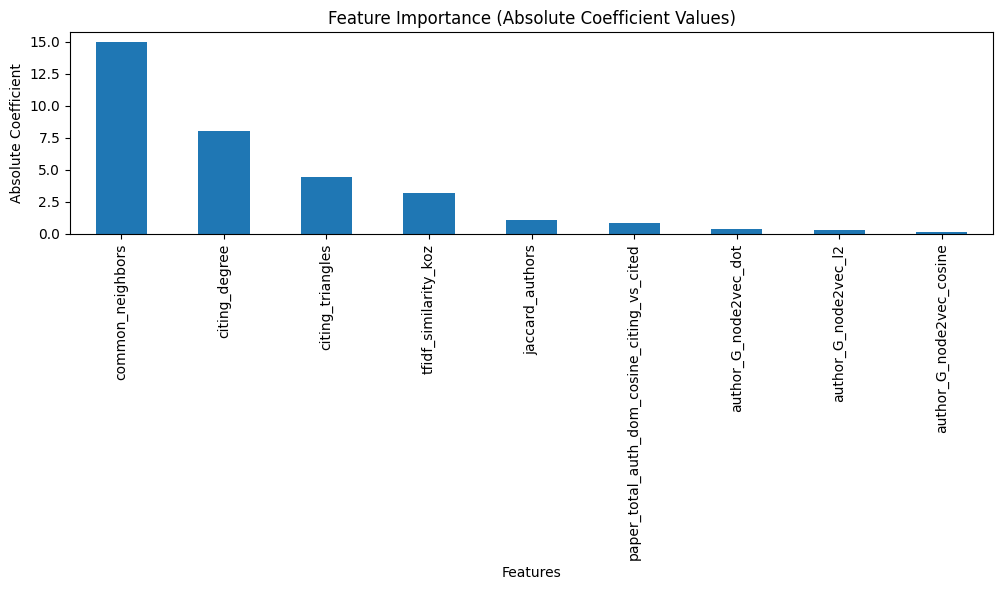

In [438]:
import matplotlib.pyplot as plt

# 6. Visualization of feature importance (absolute values)
plt.figure(figsize=(10, 6))
# Χρησιμοποιούμε απόλυτες τιμές για ανάδειξη σπουδαιότητας
feature_importance.abs().plot(kind='bar')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient')
plt.tight_layout()
plt.show()

In [415]:
# Find best Features combinations based on AUC/Log-loss

In [296]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.feature_selection import SequentialFeatureSelector
from tqdm import tqdm  # για progress bar

# --- 1. Φόρτωση και διαχωρισμός δεδομένων ---
df_all = pd.read_parquet("D:/NLP/data/updated/total/tot_features.parquet")
train_data = df_all[df_all['split'] == 'train']
val_data   = df_all[df_all['split'] == 'val']

feats = [
    'cosine_auth_svd_koz', 'tfidf_similarity_koz', 'jaccard_authors_koz',
    'cosine_abs_svd_koz', 'common_neighbors', 'specter_similarity',
    'citation_G_sp_directed', 'citing_onion_number', 

    'bertopic_topic_cosine_similarity',

    #'author_G_resource_allocation','author_G_adamic_adar', 'author_G_common_neighbors',

    'citation_G_node2vec_cosine', 'citation_G_walklets_cosine',
    
    'author_G_walklets_cosine', 'author_G_node2vec_cosine', 
    
    
    #'citation_G_jaccard', 'citation_G_resource_allocation',
    #'citation_G_preferecial_attachment','citation_G_adamic_adar',
    #'citation_G_hub_depressed', 'citation_G_salton',
    #'citation_G_jaccard',

   
    
    
]

X_train, y_train = train_data[feats], train_data['label']
X_val,   y_val   = val_data[feats],   val_data['label']

# --- 2. Ορισμός του pipeline ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(random_state=42, max_iter=1000))
])

# --- 3. Forward Sequential Feature Selection loop με ενδιάμεσες εκτυπώσεις ---
results = []
max_k = len(feats) - 1   # δεν επιλέγουμε όλα τα feats

for k in tqdm(range(1, max_k + 1,), desc="Forward SFS"):
    # 3.1 fit SequentialFeatureSelector
    sfs = SequentialFeatureSelector(
        pipeline,
        n_features_to_select=k,
        direction='forward',
        scoring='roc_auc',
        cv=3,            # 3-fold CV
        n_jobs=1
    )
    sfs.fit(X_train, y_train)
    sel_feats = list(X_train.columns[sfs.get_support()])

    # 3.2 Εκπαίδευση τελικού μοντέλου με τα επιλεγμένα χαρακτηριστικά
    pipeline.fit(X_train[sel_feats], y_train)

    # 3.3 Προβλέψεις πιθανοτήτων
    proba_train = pipeline.predict_proba(X_train[sel_feats])[:, 1]
    proba_val   = pipeline.predict_proba(X_val[sel_feats])[:, 1]

    # 3.4 Υπολογισμός μετρικών
    train_auc = roc_auc_score(y_train, proba_train)
    val_auc   = roc_auc_score(y_val,   proba_val)
    train_ll  = log_loss(y_train,     pipeline.predict_proba(X_train[sel_feats]))
    val_ll    = log_loss(y_val,       pipeline.predict_proba(X_val[sel_feats]))

    # 3.5 Αποθήκευση
    results.append({
        'k_features': k,
        'selected':   sel_feats,
        'train_auc':  train_auc,
        'val_auc':    val_auc,
        'train_ll':   train_ll,
        'val_ll':     val_ll
    })

    # 3.6 Ενδιάμεση εκτύπωση
    print(f"\n=== k = {k} ===")
    print(f"Selected features: {sel_feats}")
    print(f"Train AUC: {train_auc:.4f} | Val AUC: {val_auc:.4f}")
    print(f"Train LogLoss: {train_ll:.4f} | Val LogLoss: {val_ll:.4f}")

# --- 4. Τελική παρουσίαση αποτελεσμάτων ---
df_results = pd.DataFrame(results)
df_results = df_results.sort_values('val_auc', ascending=False).reset_index(drop=True)

print("\n--- Top 10 by Val AUC ---")
print(df_results[['k_features','selected','train_auc','val_auc','train_ll','val_ll']].head(10))


Forward SFS:   8%|█████▊                                                                | 1/12 [00:28<05:17, 28.84s/it]


=== k = 1 ===
Selected features: ['citation_G_node2vec_cosine']
Train AUC: 0.9615 | Val AUC: 0.9076
Train LogLoss: 0.2464 | Val LogLoss: 0.4285


Forward SFS:   8%|█████▊                                                                | 1/12 [01:21<14:58, 81.68s/it]


KeyboardInterrupt: 

In [81]:
# Test on Unseen data

In [ ]:
# Old data

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import classification_report, roc_auc_score, log_loss
import matplotlib.pyplot as plt

# --- 1) Φόρτωση & προκαθορισμένο train/val split ---
df_all = pd.read_parquet("D:/NLP/tfidf_xgboost/data_full.parquet")
meta_cols = ["citing", "cited", "label", "split", 
             #"Shortest Path"
            ]
feats = [c for c in df_all.columns if c not in meta_cols]

train_data = df_all[df_all['split'] == 'train']
val_data   = df_all[df_all['split'] == 'val']

X_train = train_data[feats]
y_train = train_data['label']
X_val   = val_data[feats]
y_val   = val_data['label']

# --- 2) Ορισμός του LogisticRegression ---
logreg = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=1000,
    multi_class='auto',
    n_jobs=-1,
    penalty='l2',
    random_state=None,
    solver='lbfgs',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

# --- 3) Pipeline με StandardScaler + LogisticRegression ---
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), feats)],
    remainder="drop"
)
pipeline = Pipeline([
    ("scaler", preprocessor),
    ("clf", logreg)
])

# --- 4) Εκπαίδευση στο train set ---
pipeline.fit(X_train, y_train)

# --- 5) Αξιολόγηση ΠΡΙΝ calibration ---
y_pred_before = pipeline.predict(X_val)
probs_before  = pipeline.predict_proba(X_val)[:,1]

ll_before  = log_loss(y_val, probs_before)
roc_before = roc_auc_score(y_val, probs_before)

print("=== Validation Results BEFORE Calibration ===")
print(f"Log Loss: {ll_before:.4f}")
print(f"ROC AUC : {roc_before:.4f}")
print("\n--- Classification Report (Before Calibration) ---")
print(classification_report(y_val, y_pred_before))

D:\NLP\gnn_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Validation Results BEFORE Calibration ===
Log Loss: 0.4711
ROC AUC : 0.9843

--- Classification Report (Before Calibration) ---
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    109196
           1       0.99      0.81      0.89    109195

    accuracy                           0.90    218391
   macro avg       0.92      0.90      0.90    218391
weighted avg       0.92      0.90      0.90    218391



D:\NLP\gnn_env\lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



=== Validation Results AFTER Calibration ===
Log Loss: 0.1482
ROC AUC : 0.9844

--- Classification Report (After Calibration) ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    109196
           1       0.96      0.94      0.95    109195

    accuracy                           0.95    218391
   macro avg       0.95      0.95      0.95    218391
weighted avg       0.95      0.95      0.95    218391



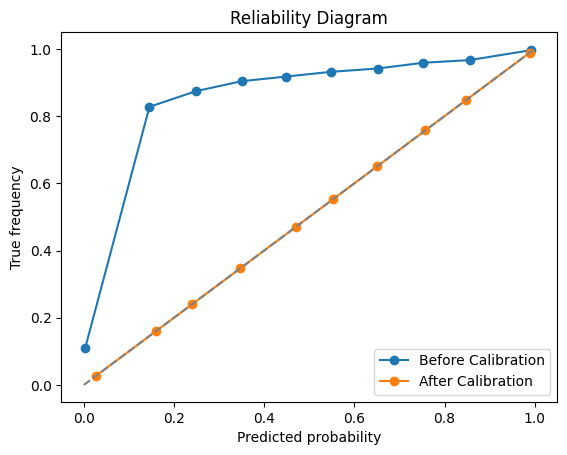

In [89]:


# --- 6) Calibration σε validation set (corrected) ---
calibrator = CalibratedClassifierCV(
    estimator=pipeline,    # ή απλώς pipeline στο πρώτο όρισμα
    method='isotonic',     # ή 'sigmoid'
    cv='prefit'
)
calibrator.fit(X_val, y_val)

# --- 7) Αξιολόγηση ΜΕΤΑ calibration ---
probs_after = calibrator.predict_proba(X_val)[:,1]
y_pred_after = (probs_after >= 0.5).astype(int)

ll_after  = log_loss(y_val, probs_after)
roc_after = roc_auc_score(y_val, probs_after)

print("\n=== Validation Results AFTER Calibration ===")
print(f"Log Loss: {ll_after:.4f}")
print(f"ROC AUC : {roc_after:.4f}")
print("\n--- Classification Report (After Calibration) ---")
print(classification_report(y_val, y_pred_after))

# --- 8) (Προαιρετικό) Reliability diagram ---
prob_true_b, prob_pred_b = calibration_curve(y_val, probs_before, n_bins=10)
prob_true_a, prob_pred_a = calibration_curve(y_val, probs_after,  n_bins=10)

plt.figure()
plt.plot(prob_pred_b, prob_true_b, marker='o', label='Before Calibration')
plt.plot(prob_pred_a, prob_true_a, marker='o', label='After Calibration')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('Predicted probability')
plt.ylabel('True frequency')
plt.title('Reliability Diagram')
plt.legend()
plt.show()


In [92]:
import pandas as pd

# --- 1) Φόρτωση του test set ---
test_path = "D:/NLP/data/test_features.parquet"
df_test = pd.read_parquet(test_path)

# --- 2) Ορισμός των feature columns (όπως και πριν) ---
meta_cols = ["citing", "cited", "label", "split",
             #"Shortest Path"
            ]
feats = [c for c in df_test.columns if c not in meta_cols]

X_test_new = df_test[feats]

# --- 3) Προβλέψεις πιθανότητας με το calibrated μοντέλο ---
#    (αν θες μη-καλιμπραρισμένες, αντικατέστησε calibrator με pipeline)
probs_test = calibrator.predict_proba(X_test_new)[:, 1]

# --- 4) Δημιουργία του DataFrame για το submission ---
submission = pd.DataFrame({
    "ID": df_test.index,    # ή range(len(probs_test))
    "Label": probs_test
})

# --- 5) Αποθήκευση σε CSV ---
output_path = "D:/NLP/data/test_predictions.csv"
submission.to_csv(output_path, index=False)

print(f"Saved test predictions to {output_path}")


Saved test predictions to D:/NLP/data/test_predictions.csv


In [1]:
import pandas as pd

# --- 1) Φόρτωση του test set ---
test_path = "D:/NLP/data/test_features.parquet"
df_test = pd.read_parquet(test_path)

print(df_test.head())

   tfidf_similarity  specter_similarity  same_bertopic  sum_bertopic_entropy  \
0          0.093897            0.871479            0.0              2.897634   
1          0.000000            0.000000            0.0              2.859581   
2          0.019091            0.916869            0.0              2.397109   
3          0.000000            0.000000            0.0              1.608134   
4          0.015551            0.862471            0.0              4.558191   

   bertopic_topic_cosine  author_overlap  jaccard_authors  \
0               0.338658             0.0              0.0   
1               0.000000             0.0              0.0   
2               0.609189             0.0              0.0   
3               0.000000             0.0              0.0   
4               0.208162             0.0              0.0   

   author_mean_pagerank_citing  author_mean_pagerank_cited  \
0                     0.000074                    0.000099   
1                     0.0000

In [3]:
print(df_test.columns)

Index(['tfidf_similarity', 'specter_similarity', 'same_bertopic',
       'sum_bertopic_entropy', 'bertopic_topic_cosine', 'author_overlap',
       'jaccard_authors', 'author_mean_pagerank_citing',
       'author_mean_pagerank_cited', 'author_max_pagerank_citing',
       'author_max_pagerank_cited', 'author_mean_degree_citing',
       'author_mean_degree_cited', '(S) Degree', '(D) Degree',
       '(S) Avg neigh deg', '(D) Avg neigh deg', '(S) Triangles',
       '(D) Triangles', '(S) Core number', '(D) Core number',
       '(S) Eig centrality', '(D) Eig centrality', '(S) Clustering',
       '(D) Clustering', '(S) Greedy color', '(D) Greedy color',
       '(S) Onion number', '(D) Onion number', 'Jaccard Coefficient',
       'Salton index', 'Hub Depressed Index', 'Academic Adar Index',
       'Pref Attachment', 'Ressource Allocation Index', 'Shortest Path',
       'author_common_neighbors', 'author_adamic_adar',
       'author_resource_allocation', 'citation_node2vec_cosine',
       'citat